# Chapter 1
This chapter introduces some useful insights about data by doing a simple social network

In [1]:
# Data
users = [
{ "id": 0, "name": "Hero" },
{ "id": 1, "name": "Dunn" },
{ "id": 2, "name": "Sue" },
{ "id": 3, "name": "Chi" },
{ "id": 4, "name": "Thor" },
{ "id": 5, "name": "Clive" },
{ "id": 6, "name": "Hicks" },
{ "id": 7, "name": "Devin" },
{ "id": 8, "name": "Kate" },
{ "id": 9, "name": "Klein" }
]
# Having friendships represented like this, makes harder to work with them
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [2]:
# dictionary where keys are user ids and the value is a list of friends
# dictionary with empty list
friendships = {user['id']:[] for user in users}
# populating the lists
for f1, f2 in friendship_pairs:
    friendships[f1].append(f2)
    friendships[f2].append(f1)
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [3]:
# What is the avg number of connections?
def number_of_friends(user):
    user_id = user["id"]
    friends_ids = friendships[user_id]
    return len(friends_ids)

total_connections = sum(number_of_friends(user) for user in users)
num_users = len(users)
avg_connections = total_connections / num_users 
avg_connections

2.4

In [4]:
# Most connected people
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]
num_friends_by_id.sort(
    key=lambda id_and_friends: id_and_friends[1], reverse=True
)
num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [5]:
# Friends suggestions
def foaf_ids_bad(user):
    # friend of a frined function
    return [foaf_id 
            for friend_id in friendships[user["id"]]
            for foaf_id in friendships[friend_id]]

foaf_ids_bad(users[0])
#redundant information

[0, 2, 3, 0, 1, 3]

In [6]:
from collections import Counter
# Count of mutual friends, excluding already known people
def frineds_of_friends(user):
    user_id = user["id"]
    return Counter(
        foaf_id
        for friend_id in friendships[user_id] # For each of my friends
        for foaf_id in friendships[friend_id] # Find their friends
        if foaf_id != user_id                 # who aren't me
        and foaf_id not in friendships[user_id] # and aren't my friends
    )
frineds_of_friends(users[3])
# Mutual friends, two with Hero (0), one with Clive (5)

Counter({0: 2, 5: 1})

In [7]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [10]:
# Similar interests between people (my function)
interests_dict = {interest:[] for _, interest in interests}
for id_person, interest in interests:
    interests_dict[interest].append(id_person)
interests_dict

{'Hadoop': [0, 9],
 'Big Data': [0, 8, 9],
 'HBase': [0, 1],
 'Java': [0, 5, 9],
 'Spark': [0],
 'Storm': [0],
 'Cassandra': [0, 1],
 'NoSQL': [1],
 'MongoDB': [1],
 'Postgres': [1],
 'Python': [2, 3, 5],
 'scikit-learn': [2, 7],
 'scipy': [2],
 'numpy': [2],
 'statsmodels': [2],
 'pandas': [2],
 'R': [3, 5],
 'statistics': [3, 6],
 'regression': [3, 4],
 'probability': [3, 6],
 'machine learning': [4, 7],
 'decision trees': [4],
 'libsvm': [4],
 'C++': [5],
 'Haskell': [5],
 'programming languages': [5],
 'mathematics': [6],
 'theory': [6],
 'Mahout': [7],
 'neural networks': [7, 8],
 'deep learning': [8],
 'artificial intelligence': [8],
 'MapReduce': [9]}

In [11]:
from collections import defaultdict
# interest:user_ids with that interest
user_ids_by_interests = defaultdict(list)
for user_id, interest in interests:
    user_ids_by_interests[interest].append(user_id)
print(user_ids_by_interests)


defaultdict(<class 'list'>, {'Hadoop': [0, 9], 'Big Data': [0, 8, 9], 'HBase': [0, 1], 'Java': [0, 5, 9], 'Spark': [0], 'Storm': [0], 'Cassandra': [0, 1], 'NoSQL': [1], 'MongoDB': [1], 'Postgres': [1], 'Python': [2, 3, 5], 'scikit-learn': [2, 7], 'scipy': [2], 'numpy': [2], 'statsmodels': [2], 'pandas': [2], 'R': [3, 5], 'statistics': [3, 6], 'regression': [3, 4], 'probability': [3, 6], 'machine learning': [4, 7], 'decision trees': [4], 'libsvm': [4], 'C++': [5], 'Haskell': [5], 'programming languages': [5], 'mathematics': [6], 'theory': [6], 'Mahout': [7], 'neural networks': [7, 8], 'deep learning': [8], 'artificial intelligence': [8], 'MapReduce': [9]})


In [12]:
# Each interest of all users
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)
interests_by_user_id

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

In [14]:
# Who has the most interests in common with a given user:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        #iterating over the user's interests
        for interest in interests_by_user_id[user["id"]]
        # iterate over the others users 
        for interested_user_id in user_ids_by_interests[interest]
        # keep count of how many times we see each other user
        if interested_user_id != user["id"]
    )
most_common_interests_with(users[0])

Counter({9: 3, 8: 1, 1: 2, 5: 1})

In [19]:
# data scientists salary and tenure
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]
        

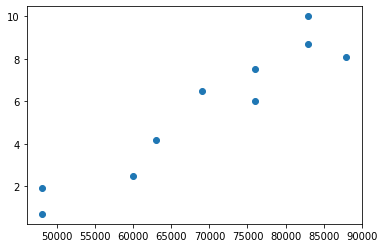

In [24]:
import matplotlib.pyplot as plt 
x = [salary for salary, _ in salaries_and_tenures]
y = [tenure for _, tenure in salaries_and_tenures]
plt.scatter(x, y)

In [25]:
# bucket the tenures
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between 2 and five"
    else:
        return "more than five"

#grouping salaries 
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)
salary_by_tenure_bucket

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between 2 and five': [60000, 63000]})

In [26]:
# average salary for each group
average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}
average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between 2 and five': 61500.0}